# Tutorial: Epidemiology Models


## Computational Economics  (ECO309)



H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forwards looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
In each period, one agent meets another agent drawn randomly.
During a meeting Susceptible agents who meet an infected agent, will always catch the disease (or the fad) but are not contagious. Infected agents, have a probability $\pi$ of being recovered. Nothing happens to Recovered agents who meet other people. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



We have:
$$
n_{S, t+1} = n_{S, t} (1 - n_{I, t}) \\
n_{I, t+1} = n_{I, t} (1 - \pi + n_{S, t}) \\
n_{R, t+1} = n_{R, t} + \pi n_{I, t}
$$

__Compute the transition function `f` for the vector state $s_t$ returning $s_{t+1}$__



In [2]:
s0 = [0.9, 0.1, 0.0]

3-element Vector{Float64}:
 0.9
 0.1
 0.0

In [9]:
function f(s; π=0.05)
    S = zeros(3)
    S[1] = s[1]*(1-s[2])
    S[2] = (1-π+s[1]) * s[2]
    S[3] = s[3] + π*s[2]
    return S
end

f (generic function with 1 method)

__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



In [13]:
s0 = [0.9, 0.1, 0.0]
simulations = []
for t = 1:50
    s1 = f(s0)
    push!(simulations, s1)
    s0 = s1
end
simulations

50-element Vector{Any}:
 [0.81, 0.18500000000000003, 0.005000000000000001]
 [0.66015, 0.32560000000000006, 0.014250000000000002]
 [0.44520515999999993, 0.5242648400000001, 0.030530000000000005]
 [0.21179974802542553, 0.7314570099745744, 0.05674324200000001]
 [0.0568773376213795, 0.8498065698798917, 0.09331609249872874]
 [0.00854260243345447, 0.8556509765738222, 0.13580642099272333]
 [0.0012331163187872432, 0.8201779138597983, 0.17858896982141445]
 [0.00022174154889784804, 0.7801803929366977, 0.21959786551440436]
 [4.8743140148332986e-5, 0.7413443716986123, 0.25860688516123925]
 [1.2607687540449662e-5, 0.7043132885662896, 0.29567410374616987]
 ⋮
 [2.934441393789132e-12, 0.13643620700661066, 0.8635637929904542]
 [2.5340773403373508e-12, 0.12961439665668048, 0.8703856033407847]
 [2.2056244347881596e-12, 0.1231336768241749, 0.8768663231736188]
 [1.934037788439451e-12, 0.11697699298323773, 0.8830230070148275]
 [1.7077998636318529e-12, 0.11112814333430207, 0.8888718566639894]
 [1.51801523559

In [5]:
import Pkg; Pkg.add("Plots")

using Plots

    Updating registry at `C:\Users\tress\.julia\registries\General.toml`
   Resolving package versions...
   Installed PlotThemes ──────────────── v3.0.0
   Installed LZO_jll ─────────────────── v2.10.1+0
   Installed PlotUtils ───────────────── v1.2.0
   Installed StructArrays ────────────── v0.6.5
   Installed URIs ────────────────────── v1.3.0
   Installed Plots ───────────────────── v1.27.5
   Installed DataValueInterfaces ─────── v1.0.0
   Installed Libffi_jll ──────────────── v3.2.2+1
   Installed OrderedCollections ──────── v1.4.1
   Installed LaTeXStrings ────────────── v1.3.0
   Installed RecipesPipeline ─────────── v0.5.2
   Installed Glib_jll ────────────────── v2.68.3+2
   Installed Xorg_libXrender_jll ─────── v0.9.10+4
   Installed FriBidi_jll ─────────────── v1.0.10+0
   Installed libvorbis_jll ───────────── v1.3.7+1
   Installed Ogg_jll ─────────────────── v1.3.5+1
   Installed ChainRulesCore ──────────── v1.14.0
   Installed Libglvnd_jll ────────────── v1.3.0+3
   Insta

+ Libmount_jll v2.35.0+0
  [89763e89] + Libtiff_jll v4.3.0+1
  [38a345b3] + Libuuid_jll v2.36.0+0
  [e7412a2a] + Ogg_jll v1.3.5+1
  [458c3c95] + OpenSSL_jll v1.1.14+0
  [91d4177d] + Opus_jll v1.3.2+0
  [2f80f16e] + PCRE_jll v8.44.0+0
  [30392449] + Pixman_jll v0.40.1+0
  [ea2cea3b] + Qt5Base_jll v5.15.3+0
  [a2964d1f] + Wayland_jll v1.19.0+0
  [2381bf8a] + Wayland_protocols_jll v1.25.0+0
  [02c8fc9c] + XML2_jll v2.9.12+0
  [aed1982a] + XSLT_jll v1.1.34+0
  [4f6342f7] + Xorg_libX11_jll v1.6.9+4
  [0c0b7dd1] + Xorg_libXau_jll v1.0.9+4
  [935fb764] + Xorg_libXcursor_jll v1.2.0+4
  [a3789734] + Xorg_libXdmcp_jll v1.1.3+4
  [1082639a] + Xorg_libXext_jll v1.3.4+4
  [d091e8ba] + Xorg_libXfixes_jll v5.0.3+4
  [a51aa0fd] + Xorg_libXi_jll v1.7.10+4
  [d1454406] + Xorg_libXinerama_jll v1.1.4+4
  [ec84b674] + Xorg_libXrandr_jll v1.5.2+4
  [ea2f1a96] + Xorg_libXrender_jll v0.9.10+4
  [14d82f49] + Xorg_libpthread_stubs_jll v0.1.0+3
  [c7cfdc94] + Xorg_libxcb_jll v1.13.0+3
  [cc61e674] + Xorg_libxkbf

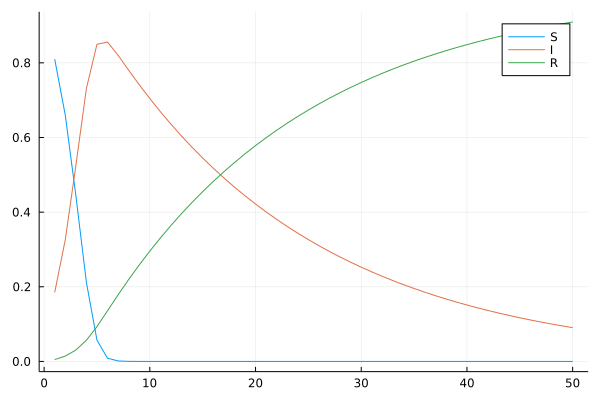

In [14]:
pl = plot()
plot!(pl, [e[1] for e in simulations], label = "S")
plot!(pl, [e[2] for e in simulations], label = "I")
plot!(pl, [e[3] for e in simulations], label = "R")

__We now assume a Susceptible person who meets an infected one has a probability $\mu$ of catching the disease. Update the transition function. Update function $f$ and write a function of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"? How would you choose parameters $\Pi$ and $\mu$ ?

The transition equations are now:
$$
n_{S, t+1} = n_{S, t} - \mu n_{I, t} n_{S, t} \\
n_{I, t+1} = (1 - \pi) n_{I, t} + \mu n_{I, t} n_{S, t} \\
n_{R, t+1} = n_{R, t} + \pi n_{I, t}
$$

In [ ]:
function f_new(s, μ, π=0.05)
    S = zeros(3)
    S[1] = s[1]*(1-μ*s[2])
    S[2] = (1-π+μ*s[1]) * s[2]
    S[3] = s[3] + π*s[2]
    return S
end

In [38]:
s0 = [0.9, 0.1, 0.0]
simulations_new = []
for t = 1:50
    s1 = f_new(s0, 0.25)
    push!(simulations_new, s1)
    s0 = s1
end
simulations_new

50-element Vector{Any}:
 [0.8775, 0.11750000000000001, 0.005000000000000001]
 [0.8517234374999999, 0.13740156250000002, 0.010875000000000003]
 [0.8224664047174072, 0.15978851715759276, 0.017745078125000004]
 [0.7896112329119744, 0.1846542631051459, 0.025734503982879645]
 [0.7531599628237479, 0.21187282003811517, 0.03496721713813694]
 [0.7132664315079305, 0.24117271035202675, 0.0455608581400427]
 [0.670261331885459, 0.2721191744568969, 0.057619493657644044]
 [0.6246635918096962, 0.3041109558098148, 0.07122545238048889]
 [0.5771718313184865, 0.3363971685105337, 0.08643100017097963]
 [0.5286320888685919, 0.36811705253490157, 0.10325085859650632]
 ⋮
 [0.016978450919551233, 0.22940887614642144, 0.7536126729340265]
 [0.016004699083510876, 0.21891218417514072, 0.7650831167413475]
 [0.015128793175151565, 0.20884248087474297, 0.7760287259501046]
 [0.014338909500316683, 0.1991902405058407, 0.7864708499938418]
 [0.013624866792326792, 0.18994477118853856, 0.7964303620191338]
 [0.012977873740991085

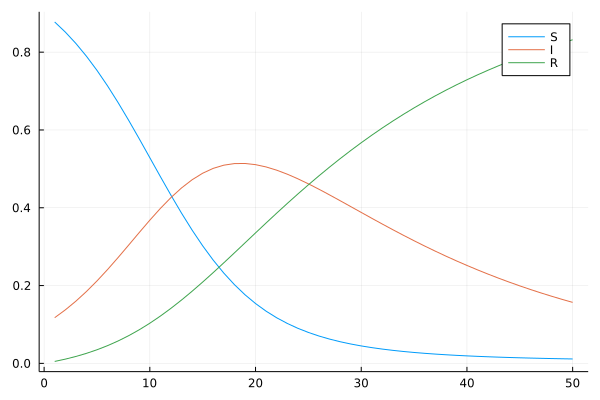

In [39]:
pl = plot()
plot!(pl, [e[1] for e in simulations_new], label = "S")
plot!(pl, [e[2] for e in simulations_new], label = "I")
plot!(pl, [e[3] for e in simulations_new], label = "R")

Playing around with different values of $\mu$, we find that lower values flattens the curve of infected individuals, lowering its maximum value and causing this maximum to be reached at a later period than for higher values. At the same time, the curves for the number of susceptible and recovered individuals respectively fall and rise more slowly.

We can interpret $\mu$ as the efficacy/use of social distancing: the more effective it is at preventing transmission, or the more people adopt this behavior, the less the disease will be able to spread.

We can choose $\mu$ by surveying a random sample of the population and asking them whether or not they are using social distancing measures; in this case, $\mu$ is the proportion of respondents who answer yes. This assumes, though, that social distancing is 100\% effective. As for $\pi$, it is equal to the percentage of people who have contracted the disease who fully recover. This also relies on an assumption: we suppose that every person who has contracted the disease, and only these people, has tested positive.

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$ stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



In [1]:
struct Status
    state::Int8
end

struct Agent
    x::Float64
    y::Float64
    status::Status
end

struct Parameters
    π::Float64
    μ::Float64
    σ::Float64
    r::Float64
end

In [2]:
p0 = Parameters(0.1, 0.1, 0.01, 0.1)

Parameters(0.1, 0.1, 0.01, 0.1)

In [3]:
const SUSCEPTIBLE = Status(0)
const INFECTED = Status(1)
const RECOVERED = Status(2)

Status(2)

In [4]:
Agent() = Agent(rand(), rand(), Status(0))

Agent

In [5]:
n = 100
population = [Agent() for i=1:n]

100-element Vector{Agent}:
 Agent(0.33608372122639907, 0.4864464490743141, Status(0))
 Agent(0.6465571240976088, 0.6690721393761134, Status(0))
 Agent(0.08395250679531607, 0.5308568962681399, Status(0))
 Agent(0.11650923685575953, 0.9390187031357817, Status(0))
 Agent(0.5776373134266266, 0.9274409475037874, Status(0))
 Agent(0.18317621927679562, 0.30067610562824443, Status(0))
 Agent(0.4033176918486242, 0.9891061968635053, Status(0))
 Agent(0.4571865531135425, 0.8590202327427413, Status(0))
 Agent(0.6200249775243768, 0.18741225004649298, Status(0))
 Agent(0.36104165189419524, 0.11637621375535934, Status(0))
 ⋮
 Agent(0.6585999307982299, 0.5971876459698953, Status(0))
 Agent(0.36120351684489216, 0.6626150301527787, Status(0))
 Agent(0.5465938131635378, 0.3448120651261958, Status(0))
 Agent(0.05935317031597698, 0.1257451261926944, Status(0))
 Agent(0.609066250776557, 0.8367761396728777, Status(0))
 Agent(0.32996273411544297, 0.4295075911043986, Status(0))
 Agent(0.3908328995943928, 0.453

__Write a function `spatial_transition(S::Vector{Agent})::Vector{Agent}` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



In [6]:
function move(agent::Agent, p::Parameters)
    x = agent.x + randn()*p.σ
    y = agent.y + randn()*p.σ
    return Agent(x, y, agent.status)
end

move (generic function with 1 method)

In [20]:
function spatial_transition(S::Vector{Agent}, p::Parameters)
    out = [move(agent, p) for agent in S]
    return out
end

spatial_transition (generic function with 1 method)

In [8]:
function random_guess(p0, T=100, N=100)
    population = [Agent() for n=1:N]
    for t in 1:T
        population = spatial_transition(population, p0)
    end
    return population
end

random_guess (generic function with 3 methods)

In [9]:
random_guess(p0)

100-element Vector{Agent}:
 Agent(0.19574382537990184, 0.8471389928679669, Status(0))
 Agent(0.8311781045690553, 0.7536869481510413, Status(0))
 Agent(0.4589916612660908, 0.933779382211711, Status(0))
 Agent(0.6126173500387754, 0.6762064240298097, Status(0))
 Agent(0.1565440663784435, 0.1624493530220001, Status(0))
 Agent(0.06718628755677342, 0.4707598845922833, Status(0))
 Agent(0.16368868046619628, 0.9470365794963257, Status(0))
 Agent(0.3528371996980642, 0.616157630124079, Status(0))
 Agent(0.7734590409535453, 0.46500307735944457, Status(0))
 Agent(0.9582692730244036, 0.6653164900391265, Status(0))
 ⋮
 Agent(0.46341490599563007, 0.26162174447046416, Status(0))
 Agent(0.23935728817256077, 0.6171108390691751, Status(0))
 Agent(0.41657106844889447, 0.09899428838041856, Status(0))
 Agent(1.00584545117051, -0.19281524731828903, Status(0))
 Agent(0.6491358187114975, 0.7187107989604689, Status(0))
 Agent(0.03878070178334181, 0.49926369423340533, Status(0))
 Agent(0.8469872729550654, 0.8127

__Write a function `show_population` to plot all agents with different colors for different health status.__



In [11]:
import Plots

using Plots

┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\tress\.julia\packages\Plots\dNEbX\src\args.jl:1230


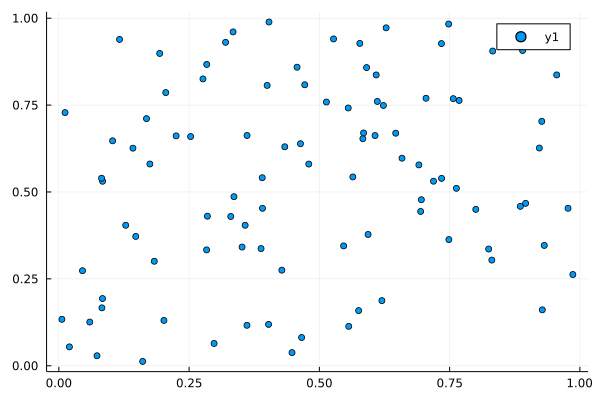

In [12]:
plot(
[a.x for a in population],
[a.y for a in population];
marker=".", seriestype=:scatter
)

In [16]:
function plot(population::Vector{Agent})
    pl = scatter(
        [a.x for a in population],
        [a.y for a in population]; marker=".", seriestype=:scatter # should make lines invisible
    )
    return pl
end

plot (generic function with 5 methods)

┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\tress\.julia\packages\Plots\dNEbX\src\args.jl:1230


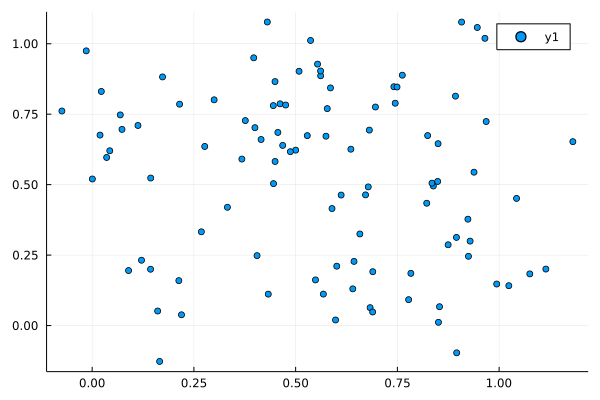

In [17]:
pop0 = random_guess(p0);
plot(pop0)

__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



In [13]:
distance(a1::Agent, a2::Agent) = sqrt( (a2.x - a1.x)^2 + (a2.y - a1.y)^2 )

distance (generic function with 1 method)

In [42]:
function evolve(S::Vector{Agent}, p::Parameters) #fix unnecessary condition if agent is susceptible (no need to check if oagent is different)
    S = spatial_transition(S, p)
    new_S = []
    for (i,agent) in enumerate(S)
        if agent.status == SUSCEPTIBLE
            infected_close = false
            for (j, oagent) in enumerate(S)
                if j != i
                    d = distance(agent, oagent)
                    if (d < p.r) && (oagent.status == INFECTED)
                        infected_close = true
                        break
                    end
                end
                break
            end
            if infected_close
                if rand() < p.μ
                    new_agent = Agent(agent.x, agent.y, INFECTED)
                else
                    new_agent = agent
                end
            else
                new_agent = agent
            end
            
        elseif agent.status == INFECTED
            if rand() < p.π
                new_agent = Agent(agent.x, agent.y, RECOVERED)
            else
                new_agent = agent
            end

        elseif agent.status == RECOVERED
            new_agent = agent
        end
        push!(new_S, new_agent)
    end
    return new_S
end

evolve (generic function with 1 method)

In [43]:
pop0[1] = Agent(pop0[1].x, pop0[1].y, INFECTED)

Agent(0.6895676830888258, 0.1912250640219829, Status(1))

In [44]:
evolve(pop0, p0)

100-element Vector{Any}:
 Agent(0.8272550037377508, 0.25881187466115274, Status(1))
 Agent(0.11056047594900595, 0.21203757304452772, Status(0))
 Agent(1.0180208289080022, 0.5806774194751482, Status(0))
 Agent(0.4244330896539547, 0.799704702310284, Status(0))
 Agent(0.15461669273111936, 0.7571831814362171, Status(0))
 Agent(0.20135136075165125, 0.8402341567417704, Status(0))
 Agent(0.9744867370666728, 0.16648757187362903, Status(0))
 Agent(-0.24318654313086727, 0.8299075881930624, Status(0))
 Agent(-0.05565938569241165, 0.581276206682554, Status(0))
 Agent(0.5187568155385529, 0.7409269468484531, Status(0))
 ⋮
 Agent(0.48443635699251886, 0.5520298805565665, Status(0))
 Agent(1.1481380881054843, 0.02365566081705836, Status(0))
 Agent(0.7333878455073054, 0.4131927277279917, Status(0))
 Agent(0.5417043330654807, 0.966941861089843, Status(0))
 Agent(0.7426400521525423, 0.44599256789865066, Status(0))
 Agent(0.9440775019655532, 0.03555887576443764, Status(0))
 Agent(0.7566708035346978, 0.9294

__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



In [45]:
function simulate(S0::Vector{Agent}, p::Parameters; T = 1)
    sim = [S0]
    for t=1:T
        pop = sim[end]
        push!(sim, evolve(pop, p))
    end
    return sim
end

simulate (generic function with 1 method)

__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

In [46]:
p0 = Parameters(0.05, 0.5, 0.1, 0.2)

Parameters(0.05, 0.5, 0.1, 0.2)

In [47]:
sim = simulate(pop0, p0; T=100);

In [48]:
sim_n_S = [count(pop, SUSCEPTIBLE) for pop in sim]
sim_n_I = [count(pop, INFECTED) for pop in sim]
sim_n_R = [count(pop, RECOVERED) for pop in sim]

MethodError: MethodError: no method matching iterate(::Status)
Closest candidates are:
  iterate(!Matched::Union{LinRange, StepRangeLen}) at C:\Users\tress\AppData\Local\Programs\Julia-1.7.2\share\julia\base\range.jl:826
  iterate(!Matched::Union{LinRange, StepRangeLen}, !Matched::Integer) at C:\Users\tress\AppData\Local\Programs\Julia-1.7.2\share\julia\base\range.jl:826
  iterate(!Matched::T) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}} at C:\Users\tress\AppData\Local\Programs\Julia-1.7.2\share\julia\base\dict.jl:695
  ...

### Additional questions

Have fun by trying to answer one of these questions:
- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)